In [21]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [22]:
SNR_array = []
random_scale = 2900

In [23]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [24]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

26 18
wvfrm = 
l =  0  SNR =  10.102842161796527  m1 =  26  m2 =  18
14 24
wvfrm = 
l =  1  SNR =  8.624498354203054  m1 =  14  m2 =  24
25 24
wvfrm = 
l =  2  SNR =  9.288293771277642  m1 =  25  m2 =  24
18 11
wvfrm = 
l =  3  SNR =  7.853185215343074  m1 =  18  m2 =  11
21 22
wvfrm = 
l =  4  SNR =  9.684524755570637  m1 =  21  m2 =  22
24 13
wvfrm = 
l =  5  SNR =  9.734028599234257  m1 =  24  m2 =  13
25 24
wvfrm = 
l =  6  SNR =  11.795056548784586  m1 =  25  m2 =  24
12 27
wvfrm = 
l =  7  SNR =  6.333258903199341  m1 =  12  m2 =  27
28 30
wvfrm = 
l =  8  SNR =  11.431643977246264  m1 =  28  m2 =  30
20 13
wvfrm = 
l =  9  SNR =  6.562479171160012  m1 =  20  m2 =  13
13 10
wvfrm = 
l =  10  SNR =  6.735962393958898  m1 =  13  m2 =  10
16 28
wvfrm = 
l =  11  SNR =  10.944478488659449  m1 =  16  m2 =  28
10 22
wvfrm = 
l =  12  SNR =  7.486338015157921  m1 =  10  m2 =  22
14 11
wvfrm = 
l =  13  SNR =  6.528444515656969  m1 =  14  m2 =  11
13 30
wvfrm = 
l =  14  SNR =  9.0208484

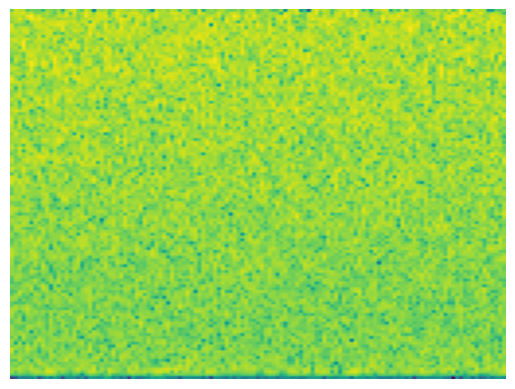

In [25]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    # random_scale900
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 18
wvfrm = 
l =  100  SNR =  8.270486038285195  m1 =  19  m2 =  18
25 10
wvfrm = 
l =  101  SNR =  6.930043107037468  m1 =  25  m2 =  10
14 14
wvfrm = 
l =  102  SNR =  7.986927080131699  m1 =  14  m2 =  14
21 11
wvfrm = 
l =  103  SNR =  7.464906398660168  m1 =  21  m2 =  11
26 24
wvfrm = 
l =  104  SNR =  10.35105699697709  m1 =  26  m2 =  24
24 17
wvfrm = 
l =  105  SNR =  10.225839950067492  m1 =  24  m2 =  17
17 10
wvfrm = 
l =  106  SNR =  6.650443741897969  m1 =  17  m2 =  10
22 23
wvfrm = 
l =  107  SNR =  11.023739191536064  m1 =  22  m2 =  23
11 27
wvfrm = 
l =  108  SNR =  7.562756176344898  m1 =  11  m2 =  27
23 29
wvfrm = 
l =  109  SNR =  12.060704950641915  m1 =  23  m2 =  29
27 19
wvfrm = 
l =  110  SNR =  10.026574294678433  m1 =  27  m2 =  19
13 16
wvfrm = 
l =  111  SNR =  8.2384019231834  m1 =  13  m2 =  16
15 21
wvfrm = 
l =  112  SNR =  8.855166908168147  m1 =  15  m2 =  21
29 26
wvfrm = 
l =  113  SNR =  11.81820390325465  m1 =  29  m2 =  26
28 22
wvfrm = 
l =

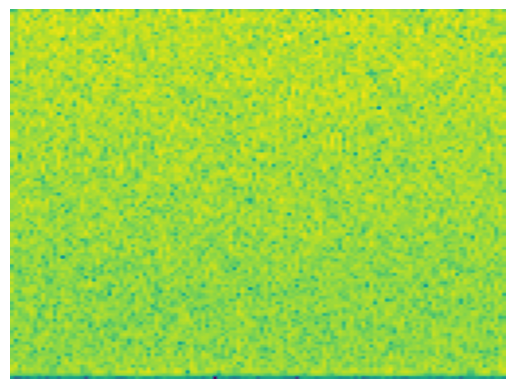

In [26]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 15
wvfrm = 
l =  200  SNR =  7.410451387404139  m1 =  10  m2 =  15
26 20
wvfrm = 
l =  201  SNR =  8.722092278132845  m1 =  26  m2 =  20
13 10
wvfrm = 
l =  202  SNR =  5.6539734185346076  m1 =  13  m2 =  10
15 14
wvfrm = 
l =  203  SNR =  7.195773389739175  m1 =  15  m2 =  14
29 29
wvfrm = 
l =  204  SNR =  13.201558130185846  m1 =  29  m2 =  29
15 12
wvfrm = 
l =  205  SNR =  7.259760728372783  m1 =  15  m2 =  12
16 22
wvfrm = 
l =  206  SNR =  8.110447383140043  m1 =  16  m2 =  22
12 25
wvfrm = 
l =  207  SNR =  7.674491462654652  m1 =  12  m2 =  25
18 22
wvfrm = 
l =  208  SNR =  8.362535822432063  m1 =  18  m2 =  22
22 17
wvfrm = 
l =  209  SNR =  7.998318074070665  m1 =  22  m2 =  17
29 18
wvfrm = 
l =  210  SNR =  9.474088201387955  m1 =  29  m2 =  18
19 26
wvfrm = 
l =  211  SNR =  10.146178611701158  m1 =  19  m2 =  26
22 15
wvfrm = 
l =  212  SNR =  8.636162910720655  m1 =  22  m2 =  15
11 27
wvfrm = 
l =  213  SNR =  9.114674954014315  m1 =  11  m2 =  27
25 16
wvfrm = 
l 

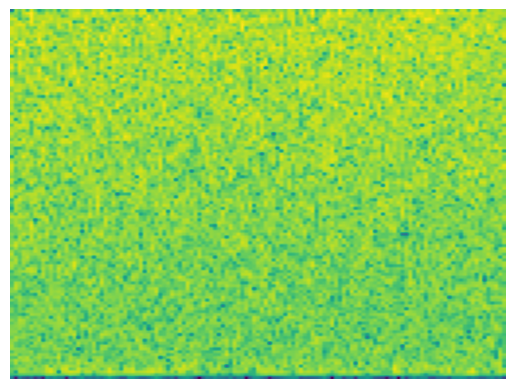

In [27]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 30
wvfrm = 
l =  300  SNR =  7.539634628901324  m1 =  10  m2 =  30
15 10
wvfrm = 
l =  301  SNR =  6.542521089332546  m1 =  15  m2 =  10
26 26
wvfrm = 
l =  302  SNR =  10.9000935345556  m1 =  26  m2 =  26
12 29
wvfrm = 
l =  303  SNR =  7.927783959979599  m1 =  12  m2 =  29
14 24
wvfrm = 
l =  304  SNR =  7.198723062469212  m1 =  14  m2 =  24
17 12
wvfrm = 
l =  305  SNR =  7.630543779875125  m1 =  17  m2 =  12
18 16
wvfrm = 
l =  306  SNR =  8.429822941741637  m1 =  18  m2 =  16
12 21
wvfrm = 
l =  307  SNR =  8.061788555627924  m1 =  12  m2 =  21
20 25
wvfrm = 
l =  308  SNR =  8.888054145681956  m1 =  20  m2 =  25
13 14
wvfrm = 
l =  309  SNR =  6.99583033252417  m1 =  13  m2 =  14
22 20
wvfrm = 
l =  310  SNR =  9.445209008188295  m1 =  22  m2 =  20
15 19
wvfrm = 
l =  311  SNR =  6.047791091687957  m1 =  15  m2 =  19
15 13
wvfrm = 
l =  312  SNR =  5.84198346179884  m1 =  15  m2 =  13
19 14
wvfrm = 
l =  313  SNR =  9.110057035514542  m1 =  19  m2 =  14
12 26
wvfrm = 
l =  314

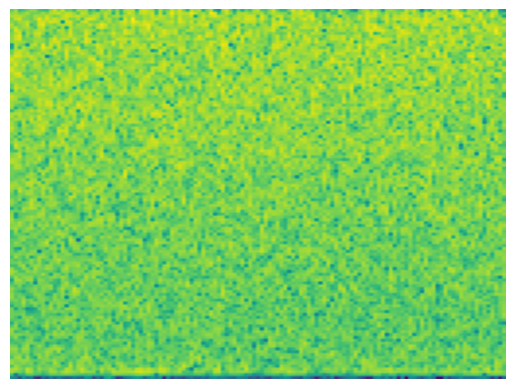

In [28]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 25
wvfrm = 


l =  400  SNR =  9.811187749369953  m1 =  19  m2 =  25
21 21
wvfrm = 
l =  401  SNR =  9.657968720107348  m1 =  21  m2 =  21
21 15
wvfrm = 
l =  402  SNR =  7.5706798576903065  m1 =  21  m2 =  15
23 14
wvfrm = 
l =  403  SNR =  7.8813122004638805  m1 =  23  m2 =  14
15 17
wvfrm = 
l =  404  SNR =  8.384932289785686  m1 =  15  m2 =  17
10 20
wvfrm = 
l =  405  SNR =  6.65780342566573  m1 =  10  m2 =  20
11 18
wvfrm = 
l =  406  SNR =  6.398352679453768  m1 =  11  m2 =  18
12 15
wvfrm = 
l =  407  SNR =  5.891167071496649  m1 =  12  m2 =  15
19 16
wvfrm = 
l =  408  SNR =  9.160877006375117  m1 =  19  m2 =  16
23 11
wvfrm = 
l =  409  SNR =  8.440088745443195  m1 =  23  m2 =  11
22 28
wvfrm = 
l =  410  SNR =  10.591349527282805  m1 =  22  m2 =  28
12 30
wvfrm = 
l =  411  SNR =  8.506853612554838  m1 =  12  m2 =  30
21 19
wvfrm = 
l =  412  SNR =  8.50291626533434  m1 =  21  m2 =  19
22 23
wvfrm = 
l =  413  SNR =  8.827257531584188  m1 =  22  m2 =  23
13 26
wvfrm = 
l =  414  SNR =  9.

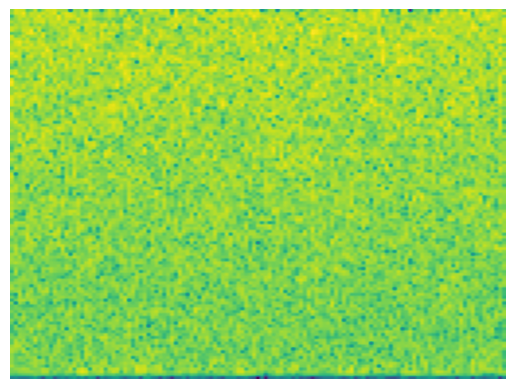

In [29]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [30]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 18
wvfrm = 
l =  500  SNR =  8.634272608569207  m1 =  23  m2 =  18
20 16
wvfrm = 
l =  501  SNR =  8.853761953341023  m1 =  20  m2 =  16
30 19
wvfrm = 
l =  502  SNR =  11.204621443677514  m1 =  30  m2 =  19
17 24
wvfrm = 
l =  503  SNR =  7.966432736461163  m1 =  17  m2 =  24
29 15
wvfrm = 
l =  504  SNR =  7.199908074490737  m1 =  29  m2 =  15
23 30
wvfrm = 
l =  505  SNR =  12.196737076383593  m1 =  23  m2 =  30
15 12
wvfrm = 
l =  506  SNR =  7.961783984916674  m1 =  15  m2 =  12
16 24
wvfrm = 
l =  507  SNR =  7.758664306254346  m1 =  16  m2 =  24
23 21
wvfrm = 
l =  508  SNR =  11.21863934963233  m1 =  23  m2 =  21
12 16
wvfrm = 
l =  509  SNR =  6.6223060537975265  m1 =  12  m2 =  16
14 24
wvfrm = 
l =  510  SNR =  8.445590953486924  m1 =  14  m2 =  24
15 14
wvfrm = 
l =  511  SNR =  6.677708840730606  m1 =  15  m2 =  14
10 21
wvfrm = 
l =  512  SNR =  7.348375012981241  m1 =  10  m2 =  21
25 24
wvfrm = 
l =  513  SNR =  10.432852703795787  m1 =  25  m2 =  24
15 30
wvfrm = 
l

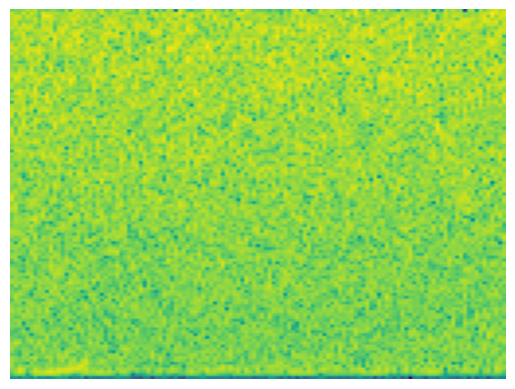

In [31]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 26
wvfrm = 
l =  600  SNR =  6.638079585506156  m1 =  10  m2 =  26
17 17
wvfrm = 
l =  601  SNR =  8.172055597899458  m1 =  17  m2 =  17
25 12
wvfrm = 
l =  602  SNR =  6.7854594551694145  m1 =  25  m2 =  12
19 20
wvfrm = 
l =  603  SNR =  8.85867619076002  m1 =  19  m2 =  20
13 24
wvfrm = 
l =  604  SNR =  8.077475589613226  m1 =  13  m2 =  24
27 19
wvfrm = 
l =  605  SNR =  8.479145012032914  m1 =  27  m2 =  19
17 26
wvfrm = 
l =  606  SNR =  7.4262971973463525  m1 =  17  m2 =  26
29 15
wvfrm = 
l =  607  SNR =  10.408799121679413  m1 =  29  m2 =  15
28 22
wvfrm = 
l =  608  SNR =  11.233815847379736  m1 =  28  m2 =  22
21 16
wvfrm = 
l =  609  SNR =  7.79429749335262  m1 =  21  m2 =  16
19 11
wvfrm = 
l =  610  SNR =  7.743762660624508  m1 =  19  m2 =  11
17 27
wvfrm = 
l =  611  SNR =  9.37409591592159  m1 =  17  m2 =  27
23 27
wvfrm = 
l =  612  SNR =  10.535053962073883  m1 =  23  m2 =  27
26 12
wvfrm = 
l =  613  SNR =  6.681418392886477  m1 =  26  m2 =  12
21 25
wvfrm = 
l =

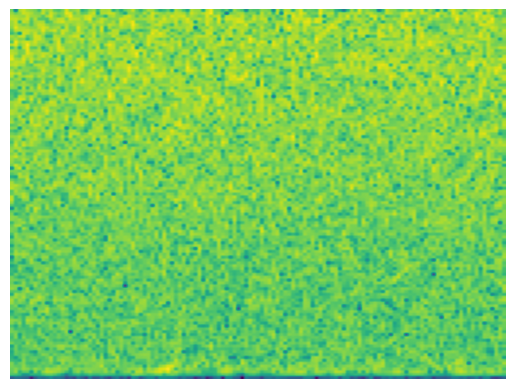

In [32]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 26
wvfrm = 
l =  700  SNR =  10.141066190958542  m1 =  19  m2 =  26
20 17
wvfrm = 
l =  701  SNR =  9.26305634998405  m1 =  20  m2 =  17
21 11
wvfrm = 
l =  702  SNR =  7.15079049114046  m1 =  21  m2 =  11
30 23
wvfrm = 
l =  703  SNR =  10.376300668851428  m1 =  30  m2 =  23
11 16
wvfrm = 
l =  704  SNR =  7.8823271470047995  m1 =  11  m2 =  16
26 26
wvfrm = 
l =  705  SNR =  10.362178364546967  m1 =  26  m2 =  26
20 21
wvfrm = 
l =  706  SNR =  9.902328224905126  m1 =  20  m2 =  21
26 10
wvfrm = 
l =  707  SNR =  6.621928367571184  m1 =  26  m2 =  10
30 29
wvfrm = 
l =  708  SNR =  11.143632000440027  m1 =  30  m2 =  29
24 18
wvfrm = 
l =  709  SNR =  10.32161476922457  m1 =  24  m2 =  18
18 23
wvfrm = 
l =  710  SNR =  9.081134542323055  m1 =  18  m2 =  23
17 12
wvfrm = 
l =  711  SNR =  5.988517338399365  m1 =  17  m2 =  12
24 22
wvfrm = 
l =  712  SNR =  9.112697236167246  m1 =  24  m2 =  22
20 22
wvfrm = 
l =  713  SNR =  11.038143193604872  m1 =  20  m2 =  22
10 26
wvfrm = 
l

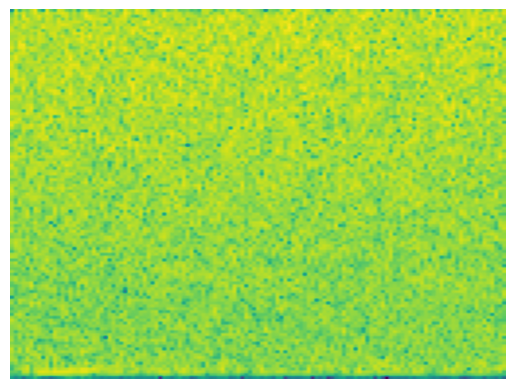

In [33]:
l = 700
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 10
wvfrm = 
l =  800  SNR =  6.78769741883427  m1 =  15  m2 =  10
29 25
wvfrm = 
l =  801  SNR =  11.439016365903589  m1 =  29  m2 =  25
12 21
wvfrm = 
l =  802  SNR =  8.251166054931991  m1 =  12  m2 =  21
27 14
wvfrm = 
l =  803  SNR =  9.887382901873812  m1 =  27  m2 =  14
25 21
wvfrm = 
l =  804  SNR =  7.855910715731782  m1 =  25  m2 =  21
11 28
wvfrm = 
l =  805  SNR =  8.37705622319257  m1 =  11  m2 =  28
29 11
wvfrm = 
l =  806  SNR =  7.477647769159851  m1 =  29  m2 =  11
15 11
wvfrm = 
l =  807  SNR =  7.537479823061217  m1 =  15  m2 =  11
27 26
wvfrm = 
l =  808  SNR =  11.690030818006287  m1 =  27  m2 =  26
19 16
wvfrm = 
l =  809  SNR =  7.365197570772751  m1 =  19  m2 =  16
12 28
wvfrm = 
l =  810  SNR =  6.762571217960183  m1 =  12  m2 =  28
15 16
wvfrm = 
l =  811  SNR =  7.713390454574318  m1 =  15  m2 =  16
25 14
wvfrm = 
l =  812  SNR =  9.920096382066184  m1 =  25  m2 =  14
30 29
wvfrm = 
l =  813  SNR =  14.250682450794285  m1 =  30  m2 =  29
28 24
wvfrm = 
l = 

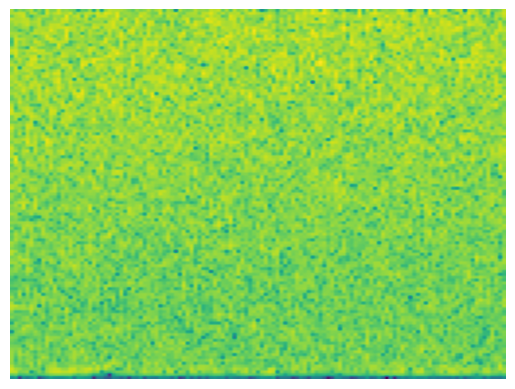

In [34]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 17
wvfrm = 
l =  900  SNR =  8.920322697872423  m1 =  23  m2 =  17
18 24
wvfrm = 
l =  901  SNR =  8.727911740111836  m1 =  18  m2 =  24
25 28
wvfrm = 
l =  902  SNR =  12.867354738027688  m1 =  25  m2 =  28
13 18
wvfrm = 
l =  903  SNR =  7.502647296609121  m1 =  13  m2 =  18
21 25
wvfrm = 
l =  904  SNR =  9.74113488905987  m1 =  21  m2 =  25
16 24
wvfrm = 
l =  905  SNR =  9.954170466220921  m1 =  16  m2 =  24
25 10
wvfrm = 
l =  906  SNR =  6.184601471569639  m1 =  25  m2 =  10
10 25
wvfrm = 
l =  907  SNR =  6.1898708024485085  m1 =  10  m2 =  25
26 21
wvfrm = 
l =  908  SNR =  9.166130093245405  m1 =  26  m2 =  21
12 24
wvfrm = 
l =  909  SNR =  6.759604484402018  m1 =  12  m2 =  24
25 29
wvfrm = 
l =  910  SNR =  12.815980299700533  m1 =  25  m2 =  29
12 26
wvfrm = 
l =  911  SNR =  6.915926307622513  m1 =  12  m2 =  26
17 26
wvfrm = 
l =  912  SNR =  9.174914278075669  m1 =  17  m2 =  26
20 14
wvfrm = 
l =  913  SNR =  9.38219916095275  m1 =  20  m2 =  14
13 27
wvfrm = 
l = 

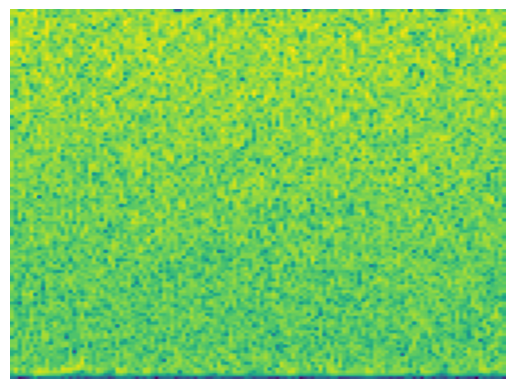

In [35]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

27 30
wvfrm = 
l =  1000  SNR =  11.288310084654672  m1 =  27  m2 =  30
15 24
wvfrm = 
l =  1001  SNR =  8.674438063370896  m1 =  15  m2 =  24
13 11
wvfrm = 
l =  1002  SNR =  5.215819858309193  m1 =  13  m2 =  11
21 22
wvfrm = 
l =  1003  SNR =  10.5177238340942  m1 =  21  m2 =  22
20 12
wvfrm = 
l =  1004  SNR =  7.39577781611512  m1 =  20  m2 =  12
25 29
wvfrm = 
l =  1005  SNR =  10.222784526907411  m1 =  25  m2 =  29
28 16
wvfrm = 
l =  1006  SNR =  8.763855028431294  m1 =  28  m2 =  16
11 29
wvfrm = 
l =  1007  SNR =  7.939739262830869  m1 =  11  m2 =  29
12 15
wvfrm = 
l =  1008  SNR =  4.556131796036791  m1 =  12  m2 =  15
10 27
wvfrm = 
l =  1008  SNR =  6.996461540869332  m1 =  10  m2 =  27
22 14
wvfrm = 
l =  1009  SNR =  7.902696592730412  m1 =  22  m2 =  14
24 29
wvfrm = 
l =  1010  SNR =  12.177259292111517  m1 =  24  m2 =  29
17 27
wvfrm = 
l =  1011  SNR =  11.339500377229415  m1 =  17  m2 =  27
25 21
wvfrm = 
l =  1012  SNR =  10.080986681969932  m1 =  25  m2 =  21
27 

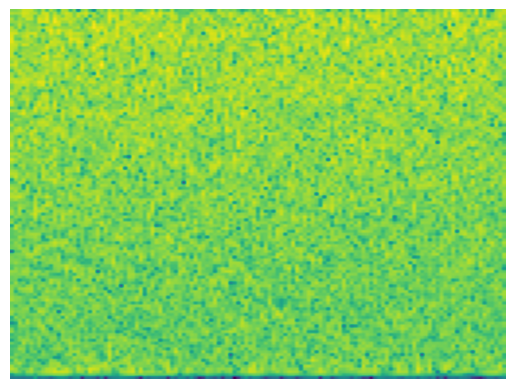

In [36]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 21
wvfrm = 
l =  1100  SNR =  7.6995924335367745  m1 =  12  m2 =  21
30 17
wvfrm = 
l =  1101  SNR =  9.582167500852641  m1 =  30  m2 =  17
12 28
wvfrm = 
l =  1102  SNR =  9.119923981385421  m1 =  12  m2 =  28
14 19
wvfrm = 
l =  1103  SNR =  7.594456551600115  m1 =  14  m2 =  19
21 23
wvfrm = 
l =  1104  SNR =  10.686337525427444  m1 =  21  m2 =  23
25 18
wvfrm = 
l =  1105  SNR =  9.461706071692767  m1 =  25  m2 =  18
27 28
wvfrm = 
l =  1106  SNR =  11.403947330874605  m1 =  27  m2 =  28
26 21
wvfrm = 
l =  1107  SNR =  9.200770820441745  m1 =  26  m2 =  21
23 20
wvfrm = 
l =  1108  SNR =  10.352185620714808  m1 =  23  m2 =  20
17 13
wvfrm = 
l =  1109  SNR =  6.063373133863841  m1 =  17  m2 =  13
23 20
wvfrm = 
l =  1110  SNR =  10.859925058796186  m1 =  23  m2 =  20
22 20
wvfrm = 
l =  1111  SNR =  9.52085253963116  m1 =  22  m2 =  20
11 24
wvfrm = 
l =  1112  SNR =  8.813059972792331  m1 =  11  m2 =  24
27 15
wvfrm = 
l =  1113  SNR =  9.182511470365219  m1 =  27  m2 =  15
19

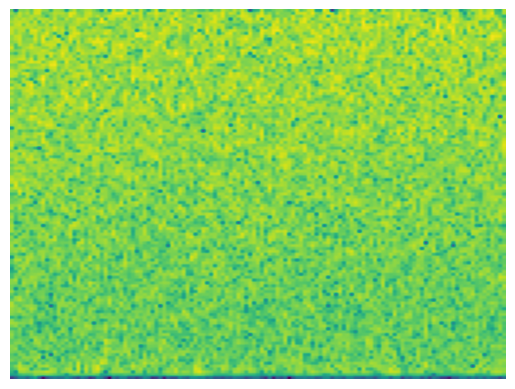

In [37]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 16
wvfrm = 
l =  1200  SNR =  9.298132418526857  m1 =  19  m2 =  16
23 12
wvfrm = 
l =  1201  SNR =  6.896674261982303  m1 =  23  m2 =  12
23 21
wvfrm = 
l =  1202  SNR =  10.17230132350067  m1 =  23  m2 =  21
14 26
wvfrm = 
l =  1203  SNR =  9.402139122591695  m1 =  14  m2 =  26
29 29
wvfrm = 
l =  1204  SNR =  11.953783152203345  m1 =  29  m2 =  29
20 29
wvfrm = 
l =  1205  SNR =  9.513017471418681  m1 =  20  m2 =  29
15 10
wvfrm = 
l =  1206  SNR =  4.565365874613431  m1 =  15  m2 =  10
13 18
wvfrm = 
l =  1206  SNR =  5.613763639237537  m1 =  13  m2 =  18
18 16
wvfrm = 
l =  1207  SNR =  8.670430191467078  m1 =  18  m2 =  16
12 10
wvfrm = 
l =  1208  SNR =  5.2538448084008635  m1 =  12  m2 =  10
13 28
wvfrm = 
l =  1209  SNR =  8.346382650843921  m1 =  13  m2 =  28
16 13
wvfrm = 
l =  1210  SNR =  7.37641998269325  m1 =  16  m2 =  13
17 21
wvfrm = 
l =  1211  SNR =  7.865080043252122  m1 =  17  m2 =  21
25 30
wvfrm = 
l =  1212  SNR =  9.861858707059213  m1 =  25  m2 =  30
24 21

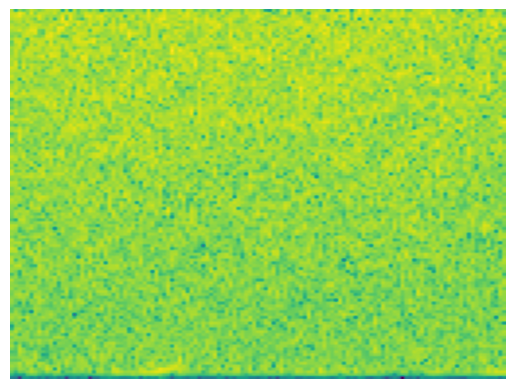

In [38]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 13
wvfrm = 
l =  1300  SNR =  8.504708856188797  m1 =  17  m2 =  13
23 14
wvfrm = 
l =  1301  SNR =  9.069694216281114  m1 =  23  m2 =  14
30 29
wvfrm = 
l =  1302  SNR =  11.126587203617188  m1 =  30  m2 =  29
14 20
wvfrm = 
l =  1303  SNR =  7.266730100815173  m1 =  14  m2 =  20
28 16
wvfrm = 
l =  1304  SNR =  11.109772352181663  m1 =  28  m2 =  16
26 24
wvfrm = 
l =  1305  SNR =  10.57057823391067  m1 =  26  m2 =  24
24 28
wvfrm = 
l =  1306  SNR =  9.299227119668844  m1 =  24  m2 =  28
16 10
wvfrm = 
l =  1307  SNR =  6.483901034983771  m1 =  16  m2 =  10
12 17
wvfrm = 
l =  1308  SNR =  8.174954635622257  m1 =  12  m2 =  17
23 20
wvfrm = 
l =  1309  SNR =  10.0260157062717  m1 =  23  m2 =  20
16 25
wvfrm = 
l =  1310  SNR =  9.185233736559727  m1 =  16  m2 =  25
22 24
wvfrm = 
l =  1311  SNR =  10.58339288020492  m1 =  22  m2 =  24
21 11
wvfrm = 
l =  1312  SNR =  6.7857622297111995  m1 =  21  m2 =  11
25 27
wvfrm = 
l =  1313  SNR =  12.312010054506597  m1 =  25  m2 =  27
18 

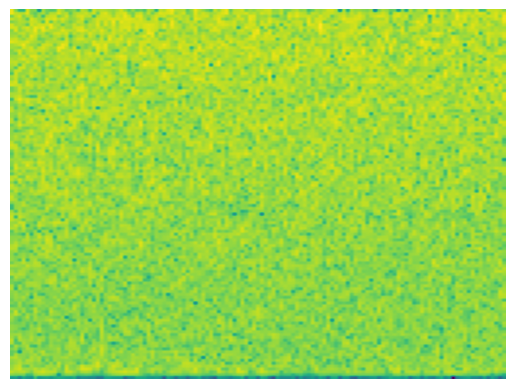

In [39]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 24
wvfrm = 
l =  1400  SNR =  10.509595676050782  m1 =  21  m2 =  24
11 25
wvfrm = 
l =  1401  SNR =  7.483431103678707  m1 =  11  m2 =  25
24 16
wvfrm = 
l =  1402  SNR =  8.95428291602246  m1 =  24  m2 =  16
25 26
wvfrm = 
l =  1403  SNR =  11.30236279512195  m1 =  25  m2 =  26
24 14
wvfrm = 
l =  1404  SNR =  9.182131759560091  m1 =  24  m2 =  14
20 22
wvfrm = 
l =  1405  SNR =  10.917607553203712  m1 =  20  m2 =  22
29 12
wvfrm = 
l =  1406  SNR =  9.487239557018434  m1 =  29  m2 =  12
14 29
wvfrm = 
l =  1407  SNR =  8.685229432640819  m1 =  14  m2 =  29
18 28
wvfrm = 
l =  1408  SNR =  8.938626736848905  m1 =  18  m2 =  28
27 16
wvfrm = 
l =  1409  SNR =  9.708029323496621  m1 =  27  m2 =  16
19 22
wvfrm = 
l =  1410  SNR =  8.83362528926569  m1 =  19  m2 =  22
28 14
wvfrm = 
l =  1411  SNR =  7.304612319685302  m1 =  28  m2 =  14
30 17
wvfrm = 
l =  1412  SNR =  10.490936376633291  m1 =  30  m2 =  17
19 12
wvfrm = 
l =  1413  SNR =  6.608155435177876  m1 =  19  m2 =  12
21 22

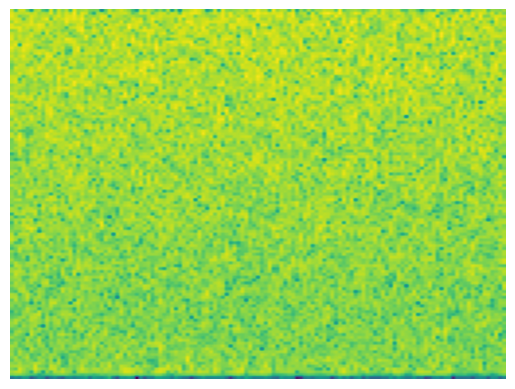

In [40]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+5000 + 6000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
